# Using Machine Learning to predict whether a breast cancer mass is malignant or benign

## Background:
    This data set was put together in the 1995 by Dr. William H. Wolberg, W. Nick Street, and Olvi L. Mangasarian. It contains the results of 539 breast cancer screens. The results are broken down into 10 attributes or features. The mean, standard deviation and worst (mean of the highest three values) were computed for each feature, resulting in a total of 30 features. Of the 539 total instances 357 were found to be benign and 212 were found to be malignant.

## Goals:
    The purpose of this assessment is use machine learning in order to predict whether a mass is benign or malignant based upon the variety of measurements given from the screenings. In order to accomplish this, we will look at three algorithms; K-Nearest Neighbor, Decision Tree and Random Forest. We will display the accuracy of each test model against the training model. Finally we will look at a few pros and cons of each algorithm and make some suggestions in order to optimize the model.

# Import Packages

In [1]:
# Import the breast cancer dataset from sklearn
from sklearn.datasets import load_breast_cancer

# Import ML modules from sklearn 
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.model_selection import train_test_split

# Import visualization packages
import matplotlib.pylab as plt
import seaborn as sns

# Import statiscal packages
import numpy as np
import pandas as pd

# Import 'warnings' in order to avoid python message
import warnings
warnings.filterwarnings('ignore')

print('----------All Packages Have Been Imported----------')

----------All Packages Have Been Imported----------


# Exploratory Analysis and Visualization

In [2]:
# Load breast cancer data into numpy array
cancer = load_breast_cancer()

# Load 'CSV' file into a pandas dataframe
df = pd.read_csv('C:\\Users\zconner\Downloads\data.csv')


In [3]:
# Display the data
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
# Display the  feature variables in the array
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
# Display the target variables
print(cancer.target_names)

['malignant' 'benign']


In [6]:
# Display the dimensions of the array
type(cancer.data)
cancer.data.shape

(569, 30)

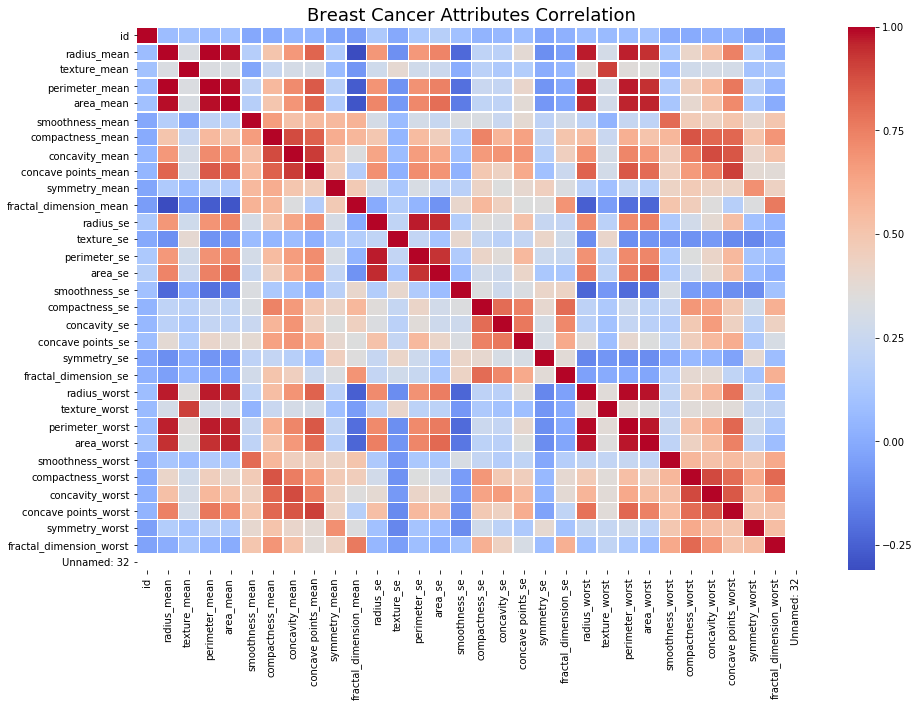

In [7]:
# Create a heatmap displaying correlation of variables using seaborn
plt.figure(figsize=(15,10))
plt.title('Breast Cancer Attributes Correlation', fontsize = 18)
sns.heatmap(df.corr(), cmap = 'coolwarm', linewidth = .5)

# Models

## K-Nearest Neighbor
- __NOT TO BE CONFUSED WITH K-MEANS__

- __Non-supervised__ algorithm, with applications in pattern recognition.

- __Non-parametric__, meaning that it does not make assumptions about data distribution.

- Based on __feature similarity__, which means how closely our data resembles our test data.

- Used for __classification__, meaning an object is classified based upon its _most common_ neighbor

Accuracy of the training set for KNN: 94.600939%
Accuracy of the test set for KNN: 93.706294%


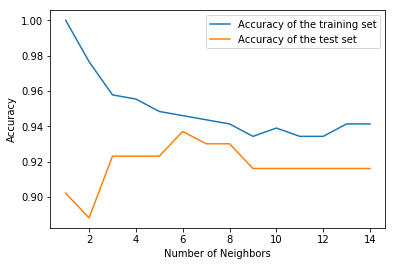

In [8]:
#---------------KNN

# Create the test and training variables using the numpy array
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

# Create empty list of accuracies
training_accuracy = []
test_accuracy = []

# Set a range for # of neighbors 
neighbors_setting = range(1,15)

# Run a 'for' loop that iterates through the range of neighbors_setting
# Add the accuracies of the test and train sets to their list
for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

# Create a plot to display the accuracy of test set vs training set
plt.plot(neighbors_setting,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')

# Label axes
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')

# Create legend
plt.legend()

# Display message with accuracy of datasets
print("Accuracy of the training set for KNN: {:3f}%".format(training_accuracy[5] * 100))
print("Accuracy of the test set for KNN: {:3f}%".format(test_accuracy[5] * 100))

## Decision Tree
- __Non-parametric supervised learning__

- The underlying statistical process is that _Decision Trees_ learn from data to approximate a sin curve with a set of _if-then-else_ decision rules.

- Data is broken down into smaller and smaller subsets while at the same time creating the "tree".

- Final result is a tree with _decision nodes_ and _leaf nodes_.

- A _decision node_ has two or more branches, while a leaf node represents the final classification or decision.

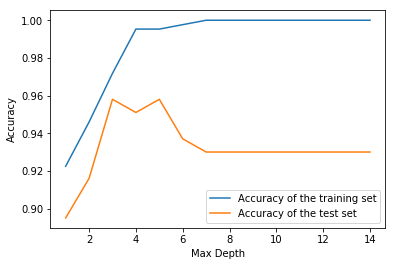

In [9]:
#---------------Decision Tree

# Create the test and training variables using the numpy array
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 42)

# Create empty list of accuracies
training_accuracy = []
test_accuracy = []

# Create a range setting the maxium depth of the tree
max_dep = range(1,15)

# Create a function that iterates through max_dep
# Add the accuracies of the test and train sets to their list
for md in max_dep:
    tree = DecisionTreeClassifier(max_depth = md, random_state = 0)
    tree.fit(X_train, y_train)
    training_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test, y_test))

# Create a plot to display the accuracy of the test and train sets
plt.plot(max_dep,training_accuracy, label='Accuracy of the training set')
plt.plot(max_dep,test_accuracy, label='Accuracy of the test set')

# Label the axes
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')

# Create a legend
plt.legend() 

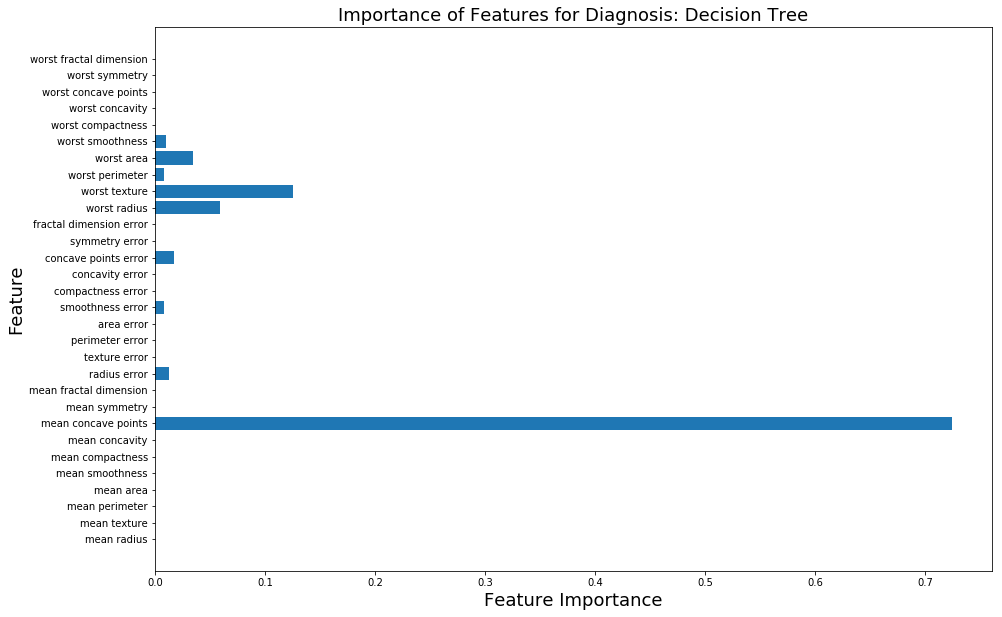

In [19]:
#Feature Importance

# Create variable for the first dimension of the numpy array
n_feature = cancer.data.shape[1]

# Create the plot area
plt.figure(figsize=(15,10))

# Add plot title
plt.title('Importance of Features for Diagnosis: Decision Tree', fontsize = 18)

# Create a horizontal bar graph to display feature importance
plt.barh(range(n_feature), tree.feature_importances_, align='center')

# Add ticks on y-axis
plt.yticks(np.arange(n_feature), cancer.feature_names)

# Label axes
plt.xlabel('Feature Importance', fontsize = 18)
plt.ylabel('Feature', fontsize = 18)

# Display plot
plt.show()

## Random Forest
- __Supervised__ algorithm
- a bunch of decision trees
- each decision tree is the forest considers a random subset of features when forming questions

In [11]:
#---------------Random forest

# Create the test and training variables using the numpy array
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# Train the random forest classifier
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train,y_train)

# Print the accuracy of the datasets
print('Accuracy for training data: {:.3f}%'.format(forest.score(X_train,y_train) * 100))
print('Accuracy for test data: {:.3f}%'.format(forest.score(X_test,y_test) * 100))

Accuracy for training data: 100.000%
Accuracy for test data: 97.203%


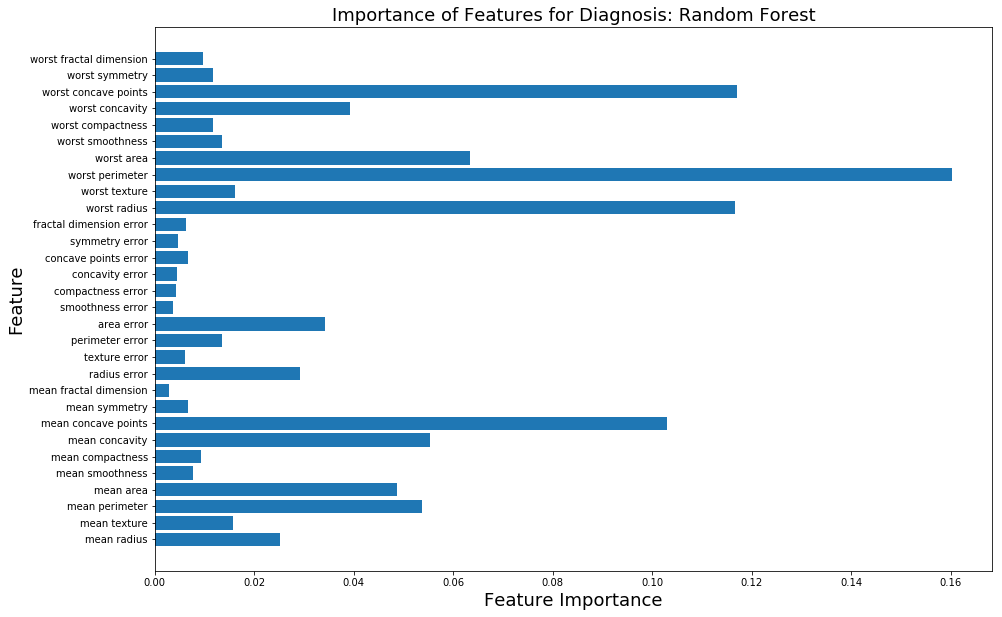

In [20]:
# Feature Importance

# Create variable for the first dimension of the numpy array
n_feature = cancer.data.shape[1]

# Create the plot area
plt.figure(figsize=(15,10))

# Add plot title
plt.title('Importance of Features for Diagnosis: Random Forest', fontsize = 18)

# Create a horizontal bar graph to display feature importance
plt.barh(range(n_feature), forest.feature_importances_, align='center')

# Add ticks on y-axis
plt.yticks(np.arange(n_feature), cancer.feature_names)

# Label axes
plt.xlabel('Feature Importance', fontsize = 18)
plt.ylabel('Feature', fontsize = 18)

# Display plot
plt.show()

# Conclusions
-__KNN:__ 94% accurate, very simple to implement, optimal number of neighbors (6)
        
-__Decision Tree:__ 96% accurate, easy to interpret, easy to overfit the model

-__Random Forest:__ 97% accurate, easy to train and predict, may be difficult to interpret results

# Discussion:
Moving foward I would like to get better at manipulating this algorithms. The next step would be to choose an algorithm, in this case I would choose the random forest, and optimize the model to try and make it more accurate in diagnosis. Furthermore, I hope to get better with different data visualizations in order to display data in more and informative ways.